# Preprocessing The 1St Dataset

In [1]:
# ranmeing the file
import os

# os.rename("final_dataset_BFP .csv" , "First_datset.csv")

print("File Renamed")

File Renamed


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('First_datset.csv')

#remove the last tow columns
data = data.iloc[:, :-2]

# remove the fourth and fifth columns
data = data.drop(data.columns[[3, 4]], axis=1)

# make the last two columns the firts two columns and the others the last
cols = data.columns.tolist()
cols = cols[-2:] + cols[:-2]
data = data[cols]

# switch the position of the first two columns
cols = data.columns.tolist()
cols = [cols[1], cols[0]] + cols[2:]
data = data[cols]

# switch the position of the third And forth columns
cols = data.columns.tolist()
cols = cols[:2] + [cols[3], cols[2]] + cols[4:]
data = data[cols]

# rename the hight (m) column to height
data = data.rename(columns={'Hight (m)': 'Height'})

# rename the weight (kg) column to weight
data = data.rename(columns={'Weight (kg)': 'Weight'})

# Display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     5000 non-null   int64  
 1   Gender  5000 non-null   object 
 2   Height  5000 non-null   float64
 3   Weight  5000 non-null   float64
 4   BMI     5000 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 195.4+ KB


In [3]:
# adding a column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('First_datset_Processed.csv', index=False)

print("File Saved")

# Display the dataset
data.head(10)

File Saved


,Age,Gender,Height,Weight,BMI,BMI Category
0,29,Male,1.820521,76.811975,23.175956,Normal
1,23,Male,1.945498,77.721154,20.534184,Normal
2,57,Female,1.742754,87.558726,28.828859,Overweight
3,41,Male,1.758318,89.473356,28.940017,Overweight
4,19,Male,1.722570,69.963943,23.578732,Normal
5,26,Female,1.498504,62.913627,28.017479,Overweight
6,33,Male,1.864738,53.598341,15.414007,Underweight
7,63,Female,1.743099,105.078061,34.583405,Obese
8,59,Female,1.818983,87.698358,26.505403,Overweight
9,65,Male,1.710349,74.798901,25.569717,Overweight


# Preprocessing of the 2Nd Dateset

In [4]:
# ranmeing the file
import os

# os.rename("gym_members_exercise_tracking_synthetic_data.csv" , "Second_datset.csv")

print("File Renamed")

File Renamed


In [5]:
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('second_datset.csv')

# Display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [6]:
# remove all null rows in gender column
data = data.dropna(subset = ['Gender'])

# keep only columns that are needed ['Age','Gender','Height (m)','Weight (kg)']
data = data[['Age', 'Gender', 'Height (m)', 'Weight (kg)']]

# fill null values in the height column with the mean
data['Height (m)'] = data['Height (m)'].fillna(data['Height (m)'].mean())

# fill null values in the weight column with the mean
data['Weight (kg)'] = data['Weight (kg)'].fillna(data['Weight (kg)'].mean())

# fill null values in the age column with the mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

# calculate the BMI
data['BMI'] = data['Weight (kg)'] / (data['Height (m)'] ** 2)

# rename the hight (m) column to height
data.rename(columns={'Height (m)': 'Height'}, inplace=True)

# rename the weight (kg) column to weight
data.rename(columns={'Weight (kg)': 'Weight'}, inplace=True)

# display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1729 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1729 non-null   float64
 1   Gender  1729 non-null   object 
 2   Height  1729 non-null   float64
 3   Weight  1729 non-null   float64
 4   BMI     1729 non-null   float64
dtypes: float64(4), object(1)
memory usage: 81.0+ KB


In [7]:
# adding a column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('Second_datset_Processed.csv', index=False)

print("File Saved")

# Display the dataset
data.head(10)

File Saved


,Age,Gender,Height,Weight,BMI,BMI Category
0,34.0,Female,1.86,86.7,25.060701,Overweight
1,26.0,Female,1.83,84.7,25.291887,Overweight
2,22.0,Male,1.85,64.8,18.933528,Normal
3,54.0,Female,1.82,75.3,22.732762,Normal
4,34.0,Female,1.74,52.8,17.439556,Underweight
5,38.0,Female,1.58,53.0,21.230572,Normal
6,44.0,Female,1.81,46.5,14.193706,Underweight
7,50.0,Female,1.63,88.5,33.309496,Obese
8,18.0,Female,1.54,82.9,34.955304,Obese
9,34.0,Female,1.74,65.9,21.766416,Normal


# Preprocessing the 3Rd dataset

In [8]:
import os

# rename the file
# os.rename("workout_fitness_tracker_data.csv" , "Third_datset.csv")

print("File Renamed")

File Renamed


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Third_datset.csv')

# remove the last 15 columns and the first column
data = data.iloc[:, 1:-15]

# rename the hight (m) column to height
data = data.rename(columns={'Height (cm)': 'Height'})

# change the values in the hight column to meters
data['Height'] = data['Height'] / 100

# rename the weight (kg) column to weight
data = data.rename(columns={'Weight (kg)': 'Weight'})

# calculate the BMI
data['BMI'] = data['Weight'] / ((data['Height']) ** 2)

# display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     10000 non-null  int64  
 1   Gender  10000 non-null  object 
 2   Height  10000 non-null  float64
 3   Weight  10000 non-null  int64  
 4   BMI     10000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [10]:
# adding a column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('Third_datset_Processed.csv', index=False)

print("File Saved")

# Display the dataset
data.head(10)

File Saved


,Age,Gender,Height,Weight,BMI,BMI Category
0,39,Male,1.75,99,32.326531,Obese
1,36,Other,1.57,112,45.437949,Obese
2,25,Female,1.80,66,20.370370,Normal
3,56,Male,1.54,89,37.527408,Obese
4,53,Other,1.94,59,15.676480,Underweight
5,33,Male,1.62,81,30.864198,Obese
6,48,Female,1.51,82,35.963335,Obese
7,59,Male,1.89,61,17.076790,Underweight
8,37,Other,1.82,113,34.114237,Obese
9,45,Female,1.98,74,18.875625,Normal


# Preprocessing the 4Th dataset

In [11]:
import os

# rename the file
# os.rename("bmi_data.csv" , "Fourth_datset.csv")

print("File Renamed")

File Renamed


In [12]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Fourth_datset.csv')

# reomve the BMI column
data = data.drop('BMI', axis=1)

# switch the position of the first two columns
cols = data.columns.tolist()
cols = [cols[1], cols[0]] + cols[2:]
data = data[cols]

# cahnge the values from inches to meters in the height column
data['Height(Inches)'] = data['Height(Inches)'] * 0.0254

# change the values from pounds to kg in the weight column
data['Weight(Pounds)'] = data['Weight(Pounds)'] * 0.453592

# rename the hight (Inches) column to height
data = data.rename(columns={'Height(Inches)': 'Height'})

# rename the weight (Pounds) column to weight
data = data.rename(columns={'Weight(Pounds)': 'Weight'})

# fill null values in the height column with the mean
data['Height'] = data['Height'].fillna(data['Height'].mean())

# fill null values in the weight column with the mean
data['Weight'] = data['Weight'].fillna(data['Weight'].mean())

# calculate the BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# rename the Sex column to Gender
data = data.rename(columns={'Sex' : 'Gender'})

#display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     25000 non-null  int64  
 1   Gender  25000 non-null  object 
 2   Height  25000 non-null  float64
 3   Weight  25000 non-null  float64
 4   BMI     25000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 976.7+ KB


In [13]:
# adding a column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('Fourth_datset_Processed.csv', index=False)

print("File Saved")

# Display the dataset
data.head(10)

File Saved


,Age,Gender,Height,Weight,BMI,BMI Category
0,21,Female,1.670896,51.252494,18.357609,Underweight
1,35,Female,1.816486,61.909547,18.762615,Normal
2,27,Female,1.762728,69.411778,22.338940,Normal
3,24,Male,1.732702,64.562199,21.504569,Normal
4,18,Female,1.721810,65.452010,22.077625,Normal
5,22,Female,1.744925,55.928982,18.368907,Underweight
6,35,Male,1.772972,64.180864,20.417469,Normal
7,19,Male,1.778374,61.898208,19.571852,Normal
8,28,Female,1.724727,50.971176,17.134987,Underweight
9,25,Male,1.696272,54.733677,19.022328,Normal


# Preprocessing the 5Th Dataset

In [14]:
import os

# os.rename("ObesityDataSet_raw_and_data_sinthetic.csv" , "Fifth_datset.csv")

print("File Renamed")

File Renamed


In [15]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Fifth_datset.csv')

# Display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [16]:
# only keep the first 4 columns
data = data.iloc[:, :4]

#save the dataset
data.to_csv('Fifth_datset_Processed.csv', index=False)
print("File Saved")

# Display the dataset
data.head(10)

File Saved


,Age,Gender,Height,Weight
0,21.0,Female,1.62,64.0
1,21.0,Female,1.52,56.0
2,23.0,Male,1.80,77.0
3,27.0,Male,1.80,87.0
4,22.0,Male,1.78,89.8
5,29.0,Male,1.62,53.0
6,23.0,Female,1.50,55.0
7,22.0,Male,1.64,53.0
8,24.0,Male,1.78,64.0
9,22.0,Male,1.72,68.0


In [17]:
# calculate the BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Add the BMI Category column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('Fifth_datset_Processed.csv', index=False)
print("File Saved")

# Display the dataset
data.info()

File Saved
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2111 non-null   float64
 1   Gender        2111 non-null   object 
 2   Height        2111 non-null   float64
 3   Weight        2111 non-null   float64
 4   BMI           2111 non-null   float64
 5   BMI Category  2111 non-null   object 
dtypes: float64(4), object(2)
memory usage: 99.1+ KB


# preprocessing the 6Th Dataset

In [18]:
import os

# rename the file
# os.rename("exercise_dataset.csv" , "Sixth_datset.csv")

print("File Renamed")

File Renamed


In [19]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Sixth_datset.csv')

# rmove the first 4 columns and the last 2 columns
data = data.iloc[:, 4:-2]

# remove the column number 3, 4
data = data.drop(data.columns[4], axis=1)
data = data.drop(data.columns[3], axis=1)

# Display the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Actual Weight  3864 non-null   float64
 1   Age            3864 non-null   int64  
 2   Gender         3864 non-null   object 
 3   BMI            3864 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 120.9+ KB


In [20]:
# make the first column the fourth
cols = data.columns.tolist()
cols = cols[1:3] + [cols[0]] + cols[3:]
data = data[cols]

# raname Acrual Wheight to Weight
data = data.rename(columns={'Actual Weight': 'Weight'})

# Display the dataset to verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     3864 non-null   int64  
 1   Gender  3864 non-null   object 
 2   Weight  3864 non-null   float64
 3   BMI     3864 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 120.9+ KB


In [28]:
# Add the BMI Category column and fill it based on the bmi if its less than 18.5 then the person is underweight if its between 18.5 and 24.9 then the person is normal if its between 25 and 29.9 then the person is overweight if its more than 30 then the person is obese
data['BMI Category'] = np.where(data['BMI'] < 18.5, 'Underweight', np.where(data['BMI'] < 24.9, 'Normal', np.where(data['BMI'] < 29.9, 'Overweight', 'Obese')))

#save the dataset
data.to_csv('Sixth_datset_Processed.csv', index=False)

print("File Saved")

# Display the dataset
data.head(10)

NameError: name 'np' is not defined

# Merging the six datasets in Onefile

In [29]:
import pandas as pd
# merge the four datasets
data = pd.concat([pd.read_csv('First_datset_Processed.csv'), pd.read_csv('Second_datset_Processed.csv'), 
                  pd.read_csv('Third_datset_Processed.csv'), pd.read_csv('Fourth_datset_Processed.csv'), 
                  pd.read_csv('Fifth_datset_Processed.csv'), pd.read_csv('Sixth_datset_Processed.csv')], 
                  ignore_index=True)
# save the merged dataset
data.to_csv('Final_dataset.csv', index=False)

print("File Saved")

# Display the dataset
data.info()

File Saved
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47704 entries, 0 to 47703
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           47704 non-null  float64
 1   Gender        47704 non-null  object 
 2   Height        47704 non-null  float64
 3   Weight        47704 non-null  float64
 4   BMI           47704 non-null  float64
 5   BMI Category  47704 non-null  object 
dtypes: float64(4), object(2)
memory usage: 2.2+ MB


In [30]:
import random
from datetime import datetime, timedelta
import pandas as pd

# Function to generate random dates (without time)
def random_date(start, end):
    date = start + timedelta(
        days=random.randint(0, (end - start).days)
    )
    return date.date()  # Return just the date portion

# Generate random dates for each row
start_date = datetime(2021, 1, 5)  # Adjust the start date as needed
end_date = datetime(2025, 3, 20)  # Adjust the end date as needed

# Generate random dates for each row (date only)
random_dates = [random_date(start_date, end_date) for _ in range(len(data))]

# Create separate columns for year, month, and day
data['Coverage Year'] = [date.year for date in random_dates]
data['Coverage Month'] = [date.month for date in random_dates]
data['Coverage Day'] = [date.day for date in random_dates]

# Save the updated dataset
data.to_csv('Final_dataset_with_coverage_date_components.csv', index=False)

print("Random Coverage Year, Month, and Day columns added and dataset saved.")

# Display the first few rows of the updated dataset
print(data[['Coverage Year', 'Coverage Month', 'Coverage Day'] + 
           [col for col in data.columns if col not in ['Coverage Year', 'Coverage Month', 'Coverage Day']]].head())

# Display dataset info
data.info()

Random Coverage Year, Month, and Day columns added and dataset saved.
   Coverage Year  Coverage Month  Coverage Day   Age  Gender    Height  \
0           2022              12            23  29.0    Male  1.820521   
1           2022               9            20  23.0    Male  1.945498   
2           2024              12            21  57.0  Female  1.742754   
3           2022               7            19  41.0    Male  1.758318   
4           2023               6            14  19.0    Male  1.722570   

      Weight        BMI BMI Category  
0  76.811975  23.175956       Normal  
1  77.721154  20.534184       Normal  
2  87.558726  28.828859   Overweight  
3  89.473356  28.940017   Overweight  
4  69.963943  23.578732       Normal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47704 entries, 0 to 47703
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             47704 non-null  float64
 1   Gen

In [31]:
# Display the dataset
pd.set_option('display.max_rows', None)


data.head(50)

,Age,Gender,Height,Weight,BMI,BMI Category,Coverage Year,Coverage Month,Coverage Day
0,29.0,Male,1.820521,76.811975,23.175956,Normal,2022,12,23
1,23.0,Male,1.945498,77.721154,20.534184,Normal,2022,9,20
2,57.0,Female,1.742754,87.558726,28.828859,Overweight,2024,12,21
3,41.0,Male,1.758318,89.473356,28.940017,Overweight,2022,7,19
4,19.0,Male,1.722570,69.963943,23.578732,Normal,2023,6,14
5,26.0,Female,1.498504,62.913627,28.017479,Overweight,2022,6,5
6,33.0,Male,1.864738,53.598341,15.414007,Underweight,2022,12,17
7,63.0,Female,1.743099,105.078061,34.583405,Obese,2025,3,2
8,59.0,Female,1.818983,87.698358,26.505403,Overweight,2022,6,17
9,65.0,Male,1.710349,74.798901,25.569717,Overweight,2023,6,2


# devide the final dataset to make the fact table and decsion tree

In [2]:
import pandas as pd
import os

# Load data
data = pd.read_csv('Final_dataset_with_coverage_date_components.csv')

# Create folder
os.makedirs('For the mssql', exist_ok=True)

# Generate matching IDs
data['Person ID'] = range(1, len(data)+1)
data['Coverage ID'] = data['Person ID']  # Make them match

# 1. Person Dimension
data[['Person ID', 'Gender', 'Age', 'Height', 'Weight']]\
    .drop_duplicates('Person ID')\
    .to_csv('For the mssql/Person_Dimension.csv', index=False)

# 2. Coverage Date Dimension 
data[['Coverage ID', 'Coverage Year', 'Coverage Month', 'Coverage Day']]\
    .to_csv('For the mssql/Coverage_Date_Dimension.csv', index=False)

# 3. BMI Fact Table
data[['Coverage ID', 'Person ID', 'BMI', 'BMI Category']]\
    .to_csv('For the mssql/BMI_Fact.csv', index=False)

print("Done. 3 files created with matching IDs.")

Done. 3 files created with matching IDs.


# Converting to SQL and MDB

In [3]:
import pandas as pd

# Input CSV
person_csv = "For the mssql/Person_Dimension.csv"
# Output SQL file
person_sql = "For the mssql/person_dimension.sql"

# Read CSV and generate SQL
df_person = pd.read_csv(person_csv)
with open(person_sql, 'w') as f:
    for _, row in df_person.iterrows():
        columns = ', '.join([f'"{col}"' for col in df_person.columns])
        values = ', '.join([f"'{str(val).replace("'", "''")}'" if pd.notna(val) else 'NULL' for val in row])
        f.write(f"INSERT INTO Person_Dimension ({columns}) VALUES ({values});\n")

print(f"Person SQL file saved: {person_sql}")

Person SQL file saved: For the mssql/person_dimension.sql


# Making Decision Tree

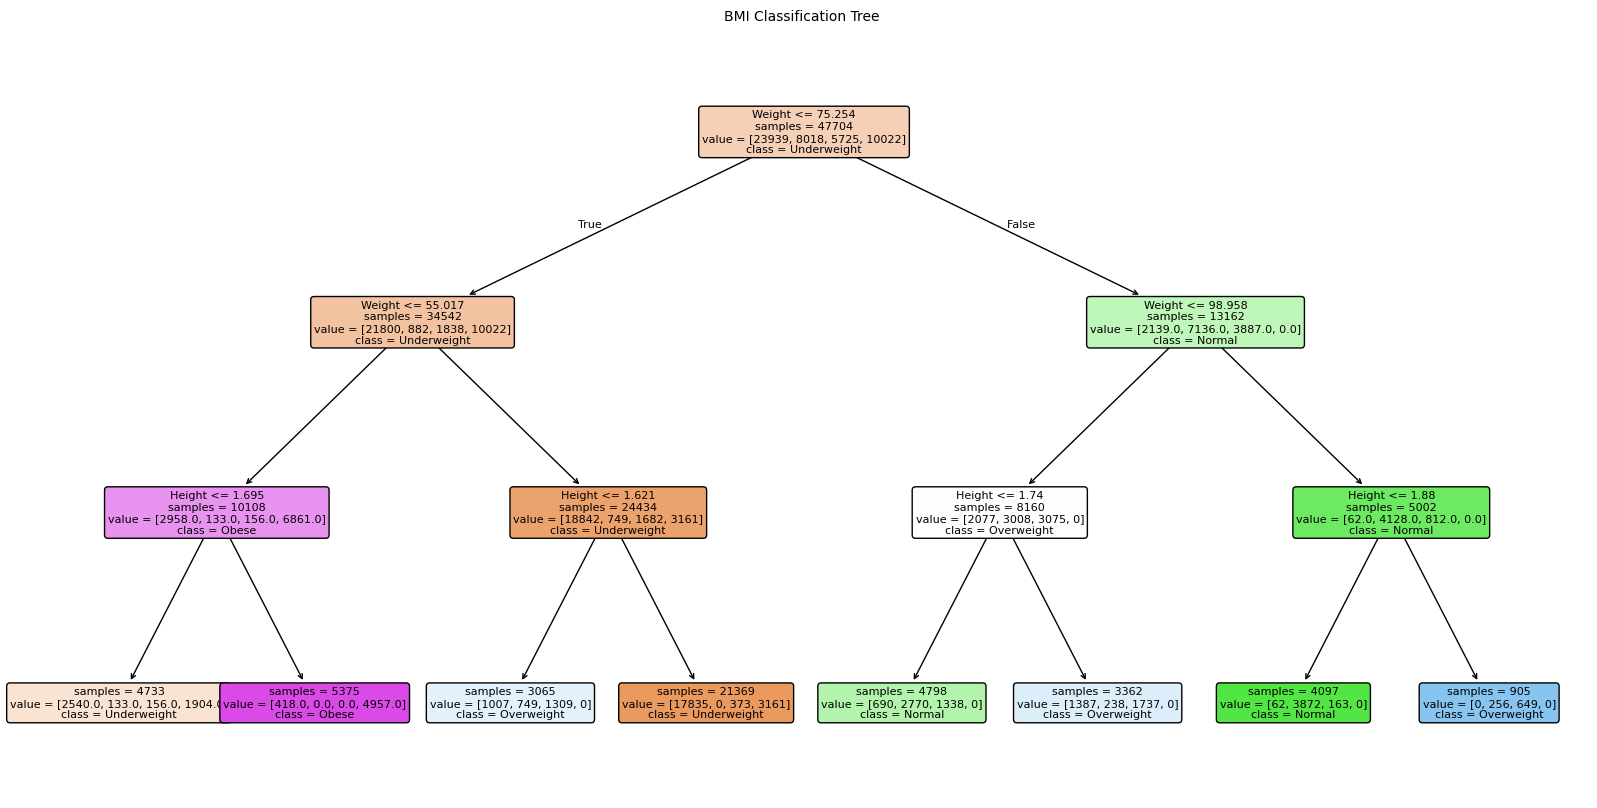


Category Distribution:
BMI Category
Underweight    10022
Normal         23939
Overweight      5725
Obese           8018
Name: count, dtype: int64


In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('Final_dataset_with_coverage_date_components.csv')
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Prepare data
category_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['BMI Category'])
X = df[['Age', 'Gender', 'Height', 'Weight']]

# Train tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y_encoded)

# Create figure with specific spacing
plt.figure(figsize=(16, 8))  # Width increased to prevent overlap
plot_tree(clf,
          feature_names=X.columns,
          class_names=category_order,
          filled=True,
          rounded=True,
          fontsize=8,          # Optimal readability
          impurity=False,
          proportion=False)

# Custom spacing adjustments
plt.subplots_adjust(left=0.07, right=0.93,  # Wider horizontal margins
                   top=0.92, bottom=0.08,   # Tighter vertical margins
                   wspace=0.35, hspace=0.4) # Extra node separation

plt.title("BMI Classification Tree ", pad=12, fontsize=10)
plt.tight_layout(pad=0.4)  # Slight overall padding
plt.show()

# Print stats
print("\nCategory Distribution:")
print(df['BMI Category'].value_counts().reindex(category_order))

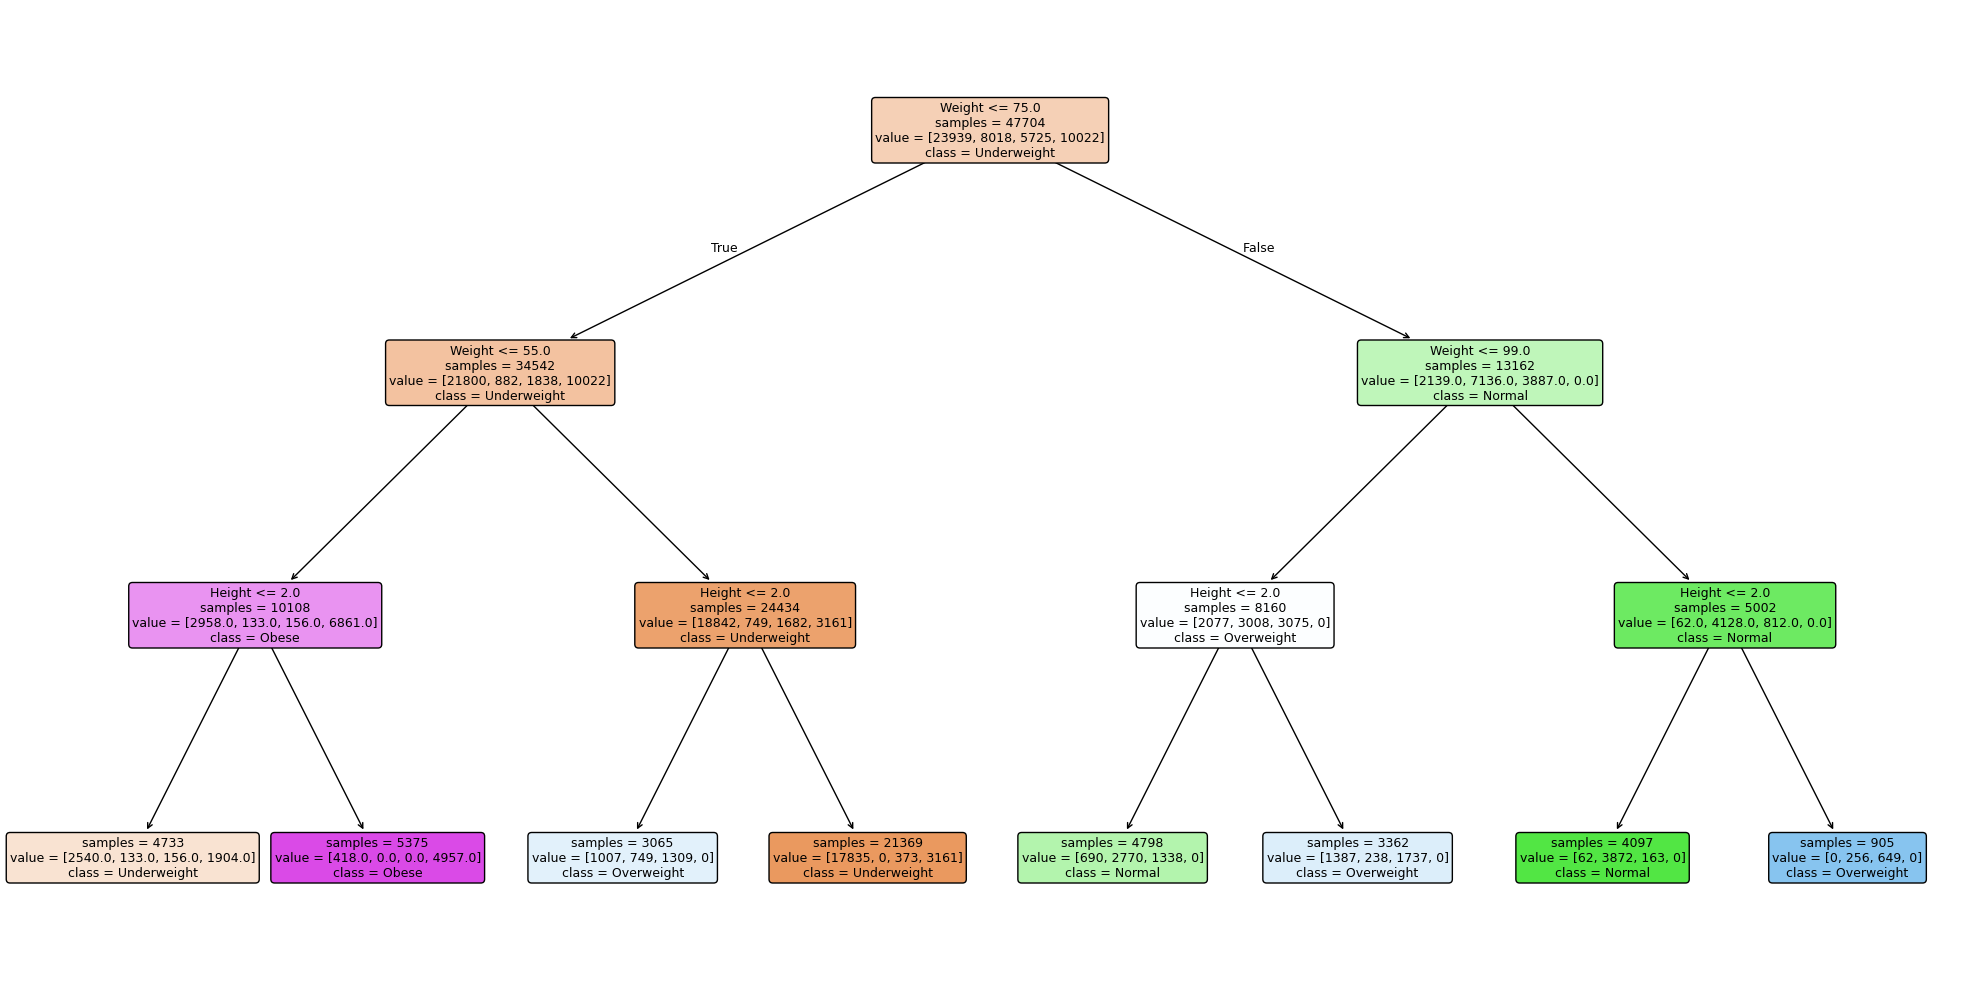


Category Distribution (Counts):
BMI Category
Underweight    10022
Normal         23939
Overweight      5725
Obese           8018
Name: count, dtype: int64


In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('Final_dataset_with_coverage_date_components.csv')
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Prepare data
category_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['BMI Category'])
X = df[['Age', 'Gender', 'Height', 'Weight']]

# Train tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y_encoded)

# Configure plot for integer values and no overlap
plt.figure(figsize=(20, 10))  # Ample space for nodes
plot_tree(clf,
          feature_names=X.columns,
          class_names=category_order,
          filled=True,
          rounded=True,
          fontsize=9,
          impurity=False,
          proportion=False,  # Ensures integer counts
          precision=0)       # Displays whole numbers

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.tight_layout()
plt.show()

# Print category distribution as integers
print("\nCategory Distribution (Counts):")
print(df['BMI Category'].value_counts().reindex(category_order).astype(int))